In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from formulaic import Formula

# Herramientas de modelos lineales
from sklearn import linear_model  

# Medidas de desempeño
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error    

In [3]:
pip install mkl numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install scikit-learn

!pip install formulaic

# Regresión Polinomial

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024

Buscamos los coeficientes de un polinomio de grado $n$
$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \dots + \beta_n X^n$$

que mejor aproxime a nuestros datos en el sentido de Cuadrados Mínimos. Es decir, buscamos $\beta_1,\dots, \beta_n$ que minimicen:
$$ RSS(\beta) = \displaystyle\sum_{i=1}^n (y_i - P(x_i))^2 $$

Vamos a usar como ejemplo los datos de PBI per capita de Argentina, del dataset `gapminder`

In [5]:
from gapminder import gapminder
datos_arg = gapminder[gapminder['country'] == 'Argentina'].reset_index(drop=True)
datos_arg.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Argentina,Americas,1952,62.485,17876956,5911.315053
1,Argentina,Americas,1957,64.399,19610538,6856.856212
2,Argentina,Americas,1962,65.142,21283783,7133.166023
3,Argentina,Americas,1967,65.634,22934225,8052.953021
4,Argentina,Americas,1972,67.065,24779799,9443.038526


### Visualización

Teníamos la visualización de la Regresión Lineal:

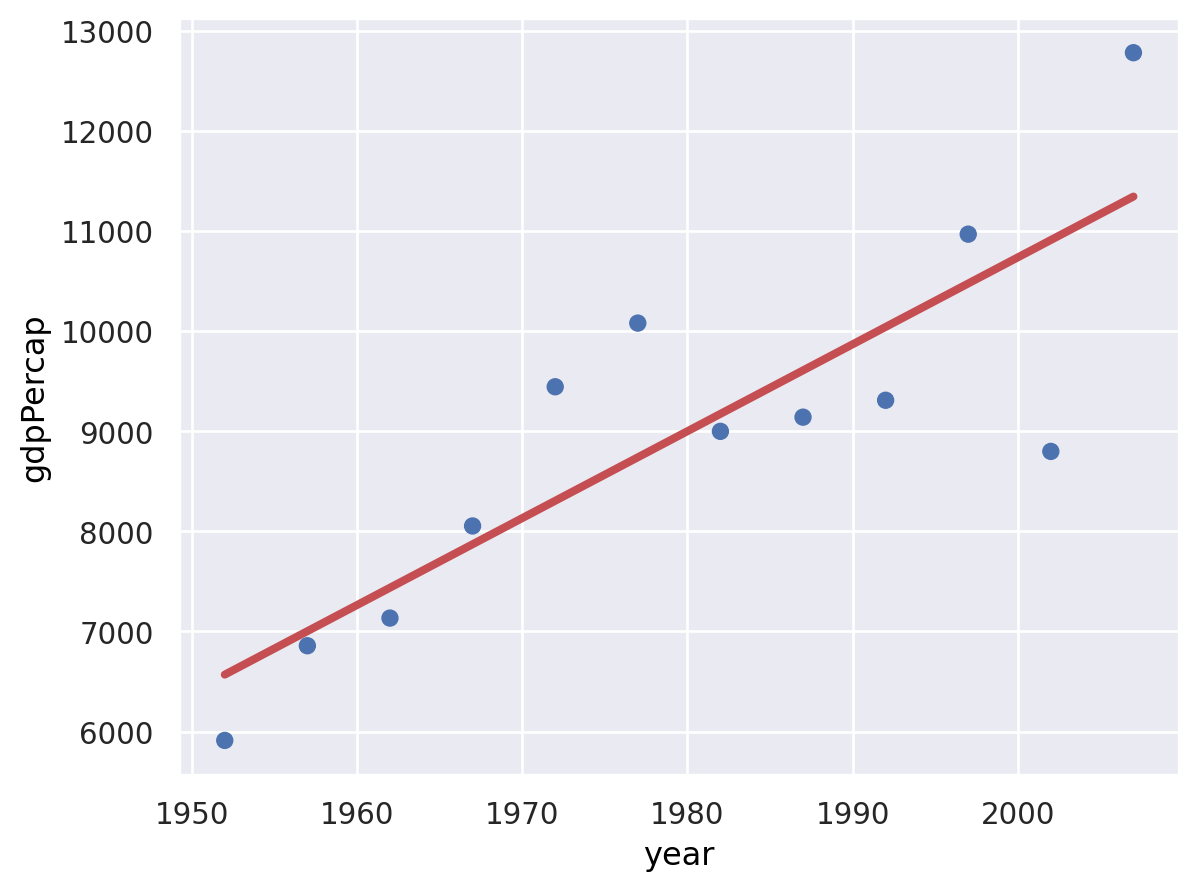

In [6]:
(
    so.Plot(data=datos_arg, x='year', y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='r', linewidth=3), so.PolyFit(1))
)

Calculemos el $R^2$ de la Regresión Lineal:

In [21]:
# Escribimos la fórmula
y, X = Formula('gdpPercap ~ year').get_model_matrix(datos_arg)

# Inicializamos el modelo de regresión
modelo = linear_model.LinearRegression(fit_intercept=False)

# Realizamos el ajuste
modelo.fit(X, y)

# Calculamos R²
y_pred = modelo.predict(X)
r2_score(datos_arg['gdpPercap'], y_pred)

0.7060056670920903

Para cambiar el grado del polinomio que ajusta los datos, simplemente cambios el argumento de `so.PolyFit`. Por ejemplo, para un polinomio de grado $3$:

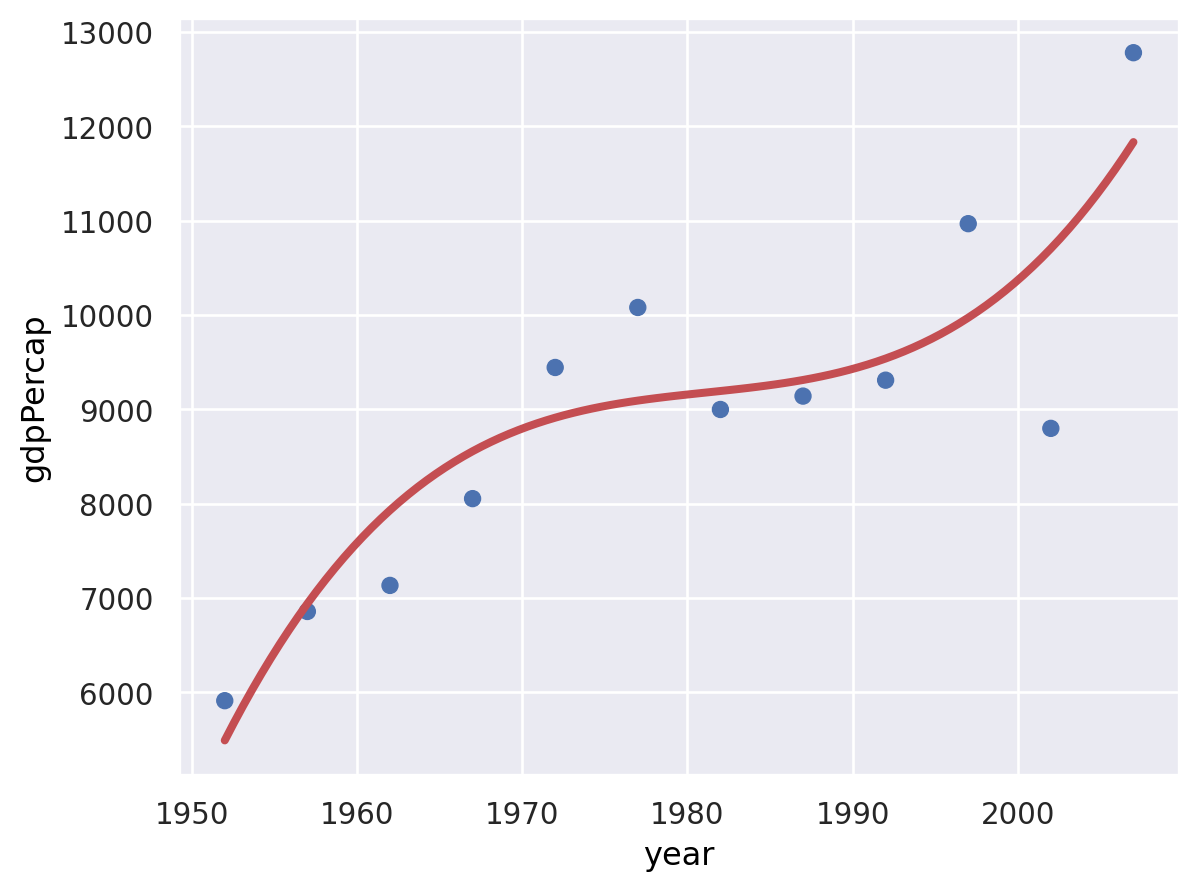

In [22]:
(
    so.Plot(data=datos_arg, x=datos_arg['year'], y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='r', linewidth=3), so.PolyFit(3))
)

### Cálculo de coeficientes y de predicciones

Queremos buscar el polinomio de grado 3 que mejor aproxima a los datos en sentido de cuadrados mínimos:
$$P(x) = \beta_0 + \beta_1 x + \beta_2 x^ 2 + \beta_3 x^ 3$$

Calcularemos los coeficientes con `scikit-learn`. Es parecido a lo que hacíamos con la regresión lineal, pero con un paso extra:

In [25]:
y,X = Formula('gdpPercap ~ poly(year, 3)').get_model_matrix(datos_arg)

Para arreglarlo y que no me aparezca el Intercept le pongo un -1, Raw = True solo me deja los datos como estan.

In [26]:
X

,Intercept,"poly(year, 3)[1]","poly(year, 3)[2]","poly(year, 3)[3]"
0,1.0,-0.459933,0.501828,-0.459933
1,1.0,-0.376309,0.228104,0.041812
2,1.0,-0.292685,0.009124,0.292685
3,1.0,-0.209061,-0.155111,0.348434
4,1.0,-0.125436,-0.264600,0.264810
5,1.0,-0.041812,-0.319345,0.097562
6,1.0,0.041812,-0.319345,-0.097562
7,1.0,0.125436,-0.264600,-0.264810
8,1.0,0.209061,-0.155111,-0.348434
9,1.0,0.292685,0.009124,-0.292685


In [27]:
# poly(year,3) significa que usamos un polinomio de grado 3 cuya variable es year
y, X = Formula('gdpPercap ~ poly(year, 3, raw=True) - 1').get_model_matrix(datos_arg)

In [28]:
X

,"poly(year, 3, raw=True)[0]","poly(year, 3, raw=True)[1]","poly(year, 3, raw=True)[2]"
0,1952,3810304,7437713408
1,1957,3829849,7495014493
2,1962,3849444,7552609128
3,1967,3869089,7610498063
4,1972,3888784,7668682048
5,1977,3908529,7727161833
6,1982,3928324,7785938168
7,1987,3948169,7845011803
8,1992,3968064,7904383488
9,1997,3988009,7964053973


In [36]:
# Inicializamos el modelo de regresión. 
modelo = linear_model.LinearRegression(fit_intercept=True)

# Realiza el ajuste
modelo.fit(X, y)

# Como usamos fit_intercept = True, la ordenada al origen está en modelo.intercept_
ordenada_al_origen = modelo.intercept_[0]

# Recuperamos los valores de los demas coeficientes (de menor potencia a la mayor)
coeficientes = modelo.coef_[0]

# Armamos el array con los valores de beta
beta = np.array([ordenada_al_origen, *coeficientes])

# Imprimimos los valores:
print('beta_0: ', beta[0])
print('beta_1: ', beta[1])
print('beta_2: ', beta[2])
print('beta_3: ', beta[3])

beta_0:  8955.553782666666
beta_1:  0.0
beta_2:  5190.582596203028
beta_3:  -586.5292072895486


Recordar que beta_0 es la ordenada al origen, los coficientes son el array(beta_1,beta_2,beta_3) y el beta array es array(beta_0,beta_1,beta_2,beta_3)

El polinomio de grado a lo sumo 3 que mejor aproxima a los datos es:
$$P(x) = -984937719.58 + 1491410.41 x -752.77 x^ 2 + 0.12 x^ 3 $$

Corroboremos que el gráfico de este polinomio es el mismo que arma `seaborn` con `so.PolyFit`:

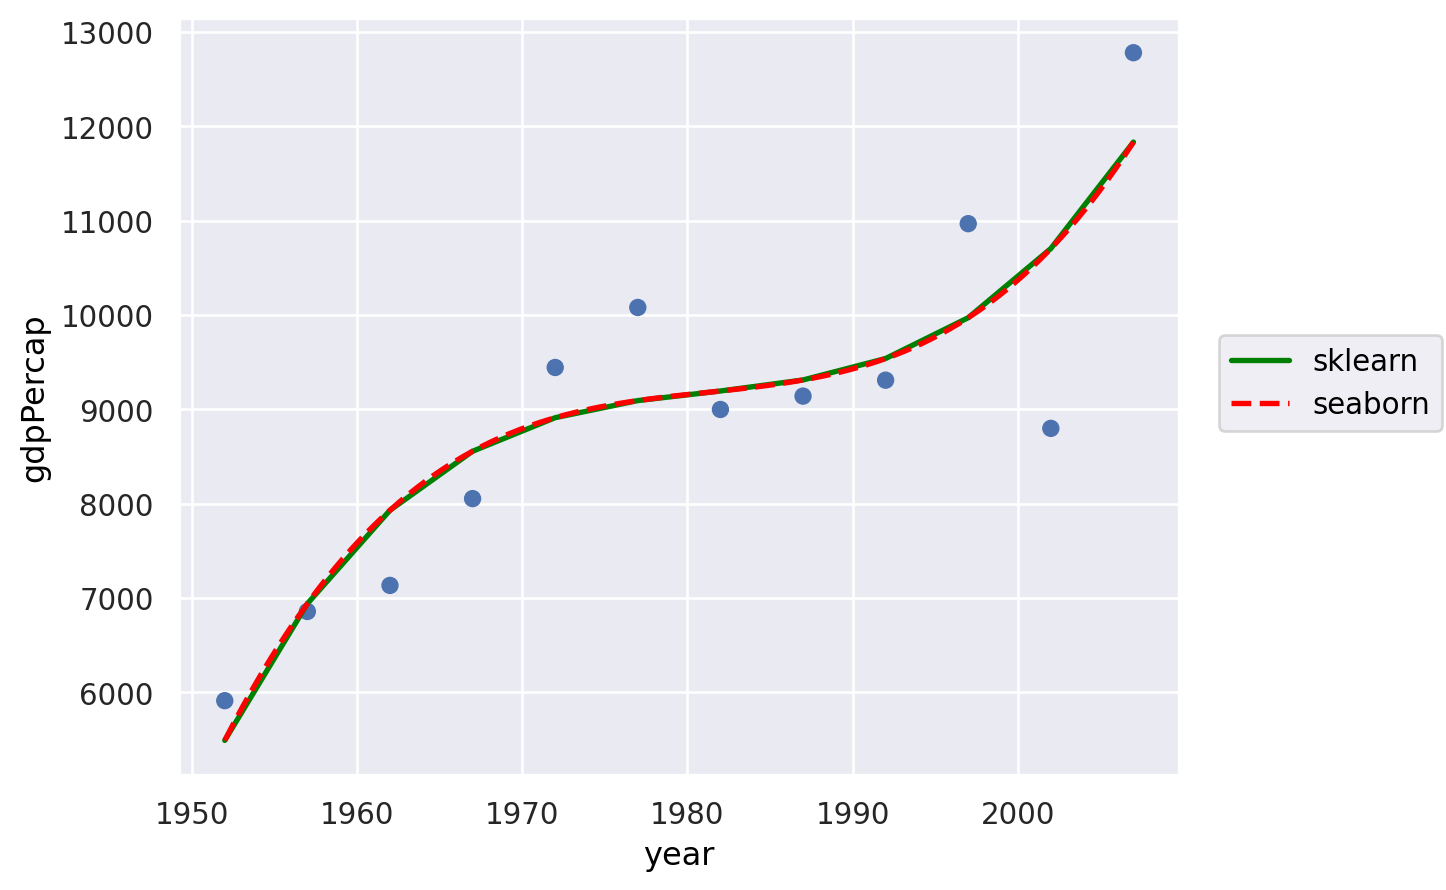

In [37]:
(
    so.Plot(data=datos_arg, x='year', y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='green', linewidth=2), y=modelo.predict(X).flatten(), label='sklearn')
    .add(so.Line(color='red', linestyle='--', linewidth=2), so.PolyFit(3), label='seaborn')
    .label()
)

modelo.predict = me devuelve una matriz con una columna y flatten lo "pega al piso".

Igual que antes, podemos estimar el PBI per capita, por ejemplo para 1990 y 2015:

* haciendo las cuentas

In [13]:
# Haciendo las cuentas a mano
prediccion_1990 = beta[0] + beta[1]*1990 + beta[2]*1990**2 + beta[3]*1990**3

# O usando numpy
prediccion_2015 = beta @ 2015**np.arange(4, dtype='int64')

print('Prediccion 1990: ', prediccion_1990)
print('Prediccion 2015: ', prediccion_2015)

Prediccion 1990:  9427.720705509186
Prediccion 2015:  14697.104549050331


* usando `predict`

In [14]:
# Armamos un array con los datos de x a los cuales les queremos aplicar el modelo
x_a_predecir = np.array([1990, 2015])

# Armamos el DataFrame para pasarle a predict
datos_a_predecir = pd.DataFrame([x**np.arange(1,4,dtype='int64') for x in x_a_predecir], columns=X.columns)

datos_a_predecir
modelo.predict(datos_a_predecir)

array([[ 9427.72070551],
       [14697.10454905]])

También podemos calcular las medidas de desempeño del modelo:

In [15]:
y_pred = modelo.predict(X)

# Calculando el R^2
r2 = r2_score(datos_arg['gdpPercap'], y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(datos_arg['gdpPercap'], y_pred)
print('ECM: ', ecm)

# Calculando la RECM
recm = root_mean_squared_error(datos_arg['gdpPercap'], y_pred)
print('RECM: ', recm)

R^2:  0.791097474147411
ECM:  664333.9855778319
RECM:  815.0668595752326


### Observación: el uso de `raw=True`

En el ejemplo, usamos `raw=True` para obtener los valores sin ortonormalizar y así simplificar la interpretación. Cuando usamos `raw=True` tenemos que agregarle el `-1` a la fórmula y, al incializar el modelo, usar `fit_intercept=True`.

In [29]:
y, X = Formula('gdpPercap ~ poly(year, 3, raw=True) - 1').get_model_matrix(datos_arg)
modelo = linear_model.LinearRegression(fit_intercept=True)

En unas clases, cuando veamos conjuntos de entrenamiento, de validación y de test, no va a ser necesario usar `raw=True`. En ese caso no agregaremos `-1` a la fórmula e inicializaremos el modelo con `fit_intercept=False`:

In [30]:
y, X = Formula('gdpPercap ~ poly(year, 3)').get_model_matrix(datos_arg)

## Acá uno define los conjuntos de entrenamiento, validación y test ##

# Cuando inicialicemos el modelo
modelo = linear_model.LinearRegression(fit_intercept=False)